Import Library package

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


# Train Data

In [3]:
# Load Train dataset
url = 'https://raw.githubusercontent.com/kevinnkevinn/data-analyst-portfolio/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv'

train_data = pd.read_csv(url)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Test Data

In [5]:
# Load test dataset
url = 'https://raw.githubusercontent.com/kevinnkevinn/data-analyst-portfolio/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/test.csv'

test_data = pd.read_csv(url)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Gender Submission

In [7]:
# Load Gendersubmission dataset
url = 'https://raw.githubusercontent.com/kevinnkevinn/data-analyst-portfolio/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/test.csv'

gender_submission = pd.read_csv(url)
gender_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Processing Data

## Data Cleaning

In [9]:
# Calculate missing values and percentages for train_data
train_missing_values = train_data.isnull().sum()
train_total_rows = len(train_data)
train_missing_percentage = (train_missing_values / train_total_rows) * 100

# Calculate missing values and percentages for test_data
test_missing_values = test_data.isnull().sum()
test_total_rows = len(test_data)
test_missing_percentage = (test_missing_values / test_total_rows) * 100

# Display the results for train_data
train_missing_info = pd.concat([train_missing_values, train_missing_percentage.round(3)], axis=1, keys=['Missing Values', 'Percentage'])
print("Train Data Missing Info:")
print(train_missing_info)

# Display the results for test_data
test_missing_info = pd.concat([test_missing_values, test_missing_percentage.round(3)], axis=1, keys=['Missing Values', 'Percentage'])
print("\nTest Data Missing Info:")
print(test_missing_info)

Train Data Missing Info:
             Missing Values  Percentage
PassengerId               0       0.000
Survived                  0       0.000
Pclass                    0       0.000
Name                      0       0.000
Sex                       0       0.000
Age                     177      19.865
SibSp                     0       0.000
Parch                     0       0.000
Ticket                    0       0.000
Fare                      0       0.000
Cabin                   687      77.104
Embarked                  2       0.224

Test Data Missing Info:
             Missing Values  Percentage
PassengerId               0       0.000
Pclass                    0       0.000
Name                      0       0.000
Sex                       0       0.000
Age                      86      20.574
SibSp                     0       0.000
Parch                     0       0.000
Ticket                    0       0.000
Fare                      1       0.239
Cabin                   327   

In [10]:
# Handling missing values for 'Age' and 'Fare' columns
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

Handling missing values with the **median** is a preferred approach for continuous numerical data like `Age` and `Fare` columns due to its robustness to outliers, preservation of data distribution, and insensitivity to skewed data. Unlike the mean, the median is not influenced by extreme values, ensuring the imputed values are not skewed by outliers. It also helps maintain the original data distribution and works well with skewed datasets. While other imputation methods exist, the choice of using the median is a practical and reliable way to fill missing values in such scenarios.

In [11]:
# Dropping rows with missing 'Embarked' values in the train dataset
train_data.dropna(subset=['Embarked'], inplace=True)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Due to factors like a high percentage of missing data, its potential irrelevance for the analysis or modelling task, the difficulty of imputation for alphanumeric codes, or data collection constraints that might result in incomplete records for some passengers, the 'Cabin' column might not be handled for missing values. The choice is frequently made based on the analysis's specific goals and the predicted effects of the "Cabin" column on the final outcomes.

## Data Exploration (Visualization)

**Histogram**

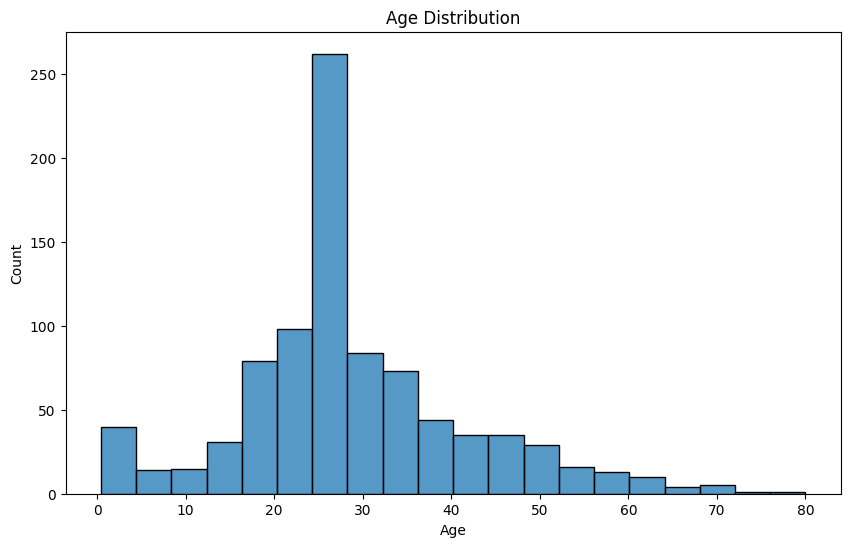

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

**Correlation Heatmap**

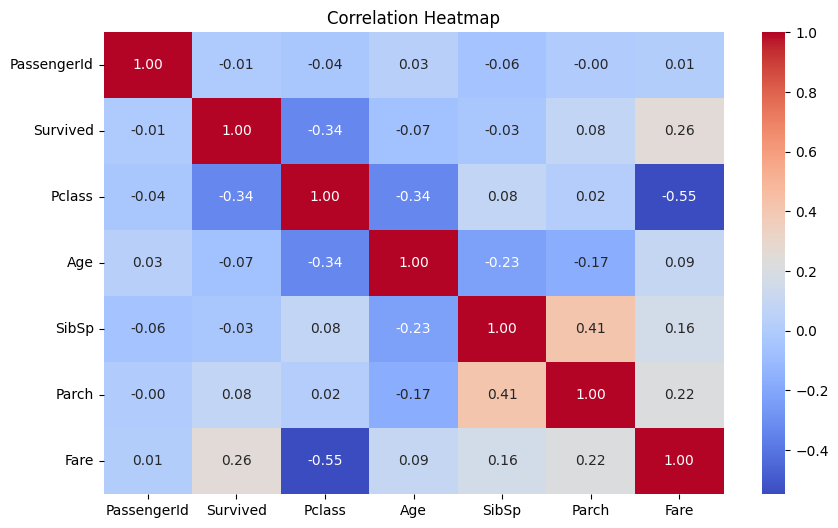

In [15]:
# List of non-numeric columns to exclude
non_numeric_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Select only the numeric columns for correlation calculation
numeric_columns = [col for col in train_data.columns if col not in non_numeric_columns]
numeric_data = train_data[numeric_columns]

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Bar chart for survival based on gender**

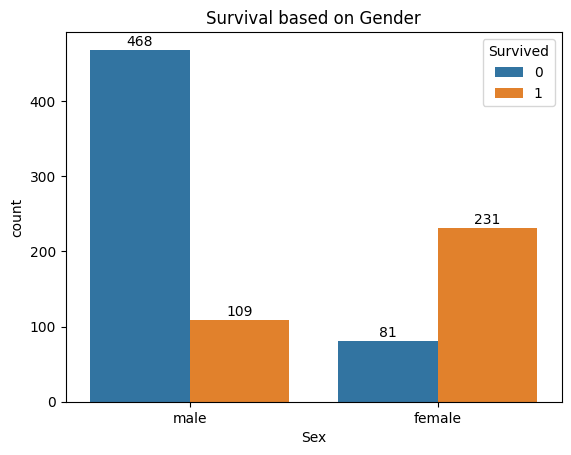

In [16]:
# Create the countplot
ax = sns.countplot(x='Sex', hue='Survived', data=train_data)

# Get the counts for each category
counts = train_data.groupby(['Sex', 'Survived']).size().reset_index(name='Counts')

# Add value annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, '{:.0f}'.format(height), ha="center")

# Set the title and display the plot
plt.title('Survival based on Gender')
plt.show()

# Feature Engineering

Extracting titles from `Name` and creating a new feature `name_title`

In [17]:
train_data['name_title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['name_title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

Simplifying the `Cabin` column to create `cabin_adv` and `cabin_multiple` features

In [18]:
train_data['cabin_adv'] = train_data['Cabin'].apply(lambda x: str(x)[0])
test_data['cabin_adv'] = test_data['Cabin'].apply(lambda x: str(x)[0])
train_data['cabin_multiple'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test_data['cabin_multiple'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

Creating a new feature `numeric_ticket` to identify if the ticket contains only numbers

In [19]:
train_data['numeric_ticket'] = train_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
test_data['numeric_ticket'] = test_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

# Data Preprocessing for Model

Selecting relevant features

In [20]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title']
X_train = train_data[selected_features]
y_train = train_data['Survived']
X_test = test_data[selected_features]

Using LabelEncoder for categorical data

In [21]:
label_encoder = LabelEncoder()

# Fit and transform 'Sex' column
X_train['Sex_encoded'] = label_encoder.fit_transform(X_train['Sex'])
print("Label Encoder values for 'Sex':")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Fit and transform 'Embarked' column
X_train['Embarked_encoded'] = label_encoder.fit_transform(X_train['Embarked'])
print("\nLabel Encoder values for 'Embarked':")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Fit and transform 'cabin_adv' column
X_train['cabin_adv_encoded'] = label_encoder.fit_transform(X_train['cabin_adv'])
print("\nLabel Encoder values for 'cabin_adv':")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Fit and transform 'name_title' column
X_train['name_title_encoded'] = label_encoder.fit_transform(X_train['name_title'])
print("\nLabel Encoder values for 'name_title':")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Encoder values for 'Sex':
{'female': 0, 'male': 1}

Label Encoder values for 'Embarked':
{'C': 0, 'Q': 1, 'S': 2}

Label Encoder values for 'cabin_adv':
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8}

Label Encoder values for 'name_title':
{'Capt': 0, 'Col': 1, 'Don': 2, 'Dr': 3, 'Jonkheer': 4, 'Lady': 5, 'Major': 6, 'Master': 7, 'Miss': 8, 'Mlle': 9, 'Mme': 10, 'Mr': 11, 'Mrs': 12, 'Ms': 13, 'Rev': 14, 'Sir': 15, 'the Countess': 16}


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1831416614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex_encoded'] = label_encoder.fit_transform(X_train['Sex'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1831416614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked_encoded'] = label_encoder.fit_transform(X_train['Embarked'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1831416614.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Impute missing values for `Fare` in the test dataset

In [22]:
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\630297141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)


Logarithmic transformation for `Fare`

In [23]:
X_train['Fare'] = X_train['Fare'].apply(lambda x: np.log1p(x))
X_test['Fare'] = X_test['Fare'].apply(lambda x: np.log1p(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1193251424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'] = X_train['Fare'].apply(lambda x: np.log1p(x))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1193251424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'] = X_test['Fare'].apply(lambda x: np.log1p(x))


Scaling the data using StandardScaler

In [24]:
# Concatenate X_train and X_test to ensure all categories are considered
X_concatenated = pd.concat([X_train, X_test], ignore_index=True)

# Define the columns to be one-hot encoded and the columns to be scaled
categorical_columns = ['Sex', 'Embarked', 'cabin_adv', 'name_title']
numeric_columns = [col for col in X_concatenated.columns if col not in categorical_columns]

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Fit and transform the preprocessor on the concatenated data
X_encoded = preprocessor.fit_transform(X_concatenated)

# Split the data back into separate sets
X_train_encoded = X_encoded[:len(X_train)]
X_test_encoded = X_encoded[len(X_train):]

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Build Model

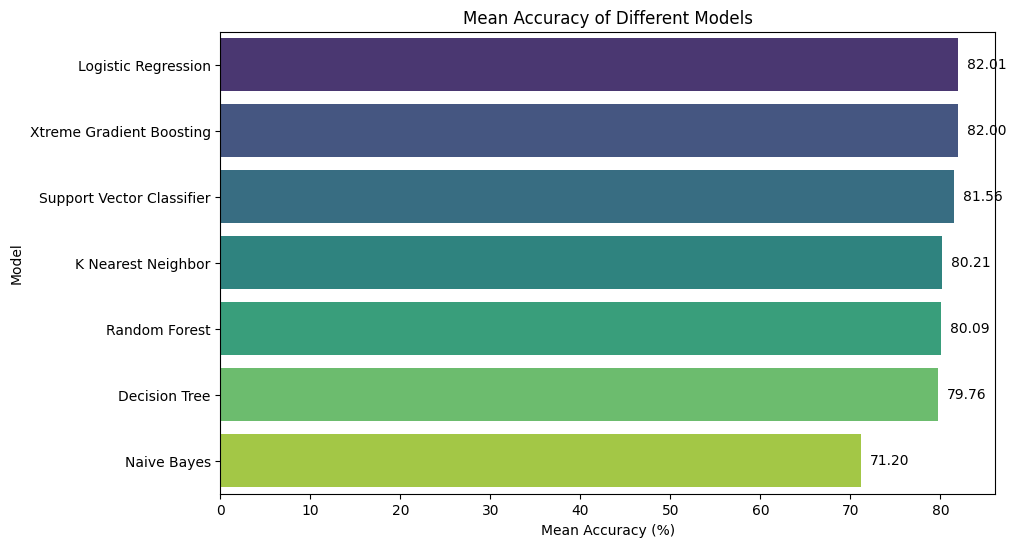

In [25]:
# Initialize the models
models = [
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('Decision Tree', DecisionTreeClassifier(random_state=1)),
    ('K Nearest Neighbor', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('Support Vector Classifier', SVC(random_state=1, probability=True)),
    ('Xtreme Gradient Boosting', xgb.XGBClassifier(random_state=1)),
]

# Lists to store model names and their mean accuracy scores
model_names = []
mean_accuracy_scores = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    model_names.append(name)
    mean_accuracy_scores.append(cv_scores.mean() * 100)

# Sort the models based on mean accuracy scores in descending order (highest to lowest accuracy)
sorted_models = sorted(zip(model_names, mean_accuracy_scores), key=lambda x: x[1], reverse=True)

# Extract the sorted model names and mean accuracy scores
sorted_model_names = [name for name, _ in sorted_models]
sorted_mean_accuracy_scores = [score for _, score in sorted_models]

# Create a bar plot for model mean accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_mean_accuracy_scores, y=sorted_model_names, palette='viridis')
plt.xlabel('Mean Accuracy (%)')
plt.ylabel('Model')
plt.title('Mean Accuracy of Different Models')

# Add annotations to each bar with the corresponding mean accuracy value
for i, v in enumerate(sorted_mean_accuracy_scores):
    plt.text(v + 1, i, f'{v:.2f}', color='black', va='center')

plt.show()

# Tunning Model

In [26]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4, 10],
    'min_samples_split': [2, 5, 10]
}

clf_rf_rnd = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=True, n_jobs=-1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", best_clf_rf_rnd.best_params_)
print("Best accuracy for Random Forest:", best_clf_rf_rnd.best_score_ * 100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best accuracy for Random Forest: 83.01720307243065


# Building Model Ensemble

In [27]:
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=1)
rf = RandomForestClassifier(random_state=1)

voting_clf = VotingClassifier(estimators=[('KNN', knn), ('SVM', svm), ('RF', rf)], voting='soft')
cv_scores_voting = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(f"Voting Classifier - Mean Accuracy: {cv_scores_voting.mean() * 100:.2f}%")

Voting Classifier - Mean Accuracy: 82.34%


# Further Ensemble Approaches

In [28]:
lr = LogisticRegression(random_state=1)
xgb = xgb.XGBClassifier(random_state=1)

voting_clf_all = VotingClassifier(estimators=[('KNN', knn), ('SVM', svm), ('RF', rf), ('LR', lr), ('XGB', xgb)], voting='soft')
cv_scores_voting_all = cross_val_score(voting_clf_all, X_train_scaled, y_train, cv=5)
print(f"Voting Classifier (All Estimators) - Mean Accuracy: {cv_scores_voting_all.mean() * 100:.2f}%")

Voting Classifier (All Estimators) - Mean Accuracy: 83.02%


# Conclusion and Final Submission

In [29]:
# Perform cross-validation and calculate the mean accuracy for the additional ensemble approaches
cv_scores_voting = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print("\nModel Additional Ensemble Approaches:")
print("Voting Classifier (KNN, SVM, RF):", cv_scores_voting.mean() * 100)
print("Voting Classifier (All Estimators):", cv_scores_voting_all.mean() * 100)


Model Additional Ensemble Approaches:
Voting Classifier (KNN, SVM, RF): 82.34241096933917
Voting Classifier (All Estimators): 83.01847267187202


In [30]:
# Define and fit the imputer on the training data
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_scaled)

# Impute missing values in X_test_scaled using the same imputer as the training data
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Choose the best-performing model for final submission
best_model = voting_clf_all

# Train the best model on the entire training dataset
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test_scaled_imputed)

# Create a submission DataFrame
submission_data = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Set the 'Survived' column to 0 for passengers who did not survive
submission_data.loc[submission_data['Survived'] == 0, 'Survived'] = 0

# Save the submission DataFrame to a CSV file for submission
submission_data.to_csv('submission.csv', index=False)

print("CSV file has been created successfully.")


CSV file has been created successfully.
